In [2]:
pip install ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipynb.fs.defs import task1

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif, r_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


In [22]:
x_train, y_train, x_test, y_test = task1.load_data()

In [23]:
mms = MinMaxScaler(feature_range=(0, 1))
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test) # normalize the testing data before testing. Note that we use the model fit using the training data

In [24]:
clf = MLPClassifier()
clf.fit(x_train_norm, y_train) # train an MLP using the training data.
mlp_scores = cross_val_score(clf, x_test_norm, y_test, cv=10)
print('Training Accuracy: ', clf.score(x_train_norm, y_train)) # Accuracy on the training data
print('Testing Accuracy: ', clf.score(x_test_norm, y_test)) # Accuracy on the testing data

Training Accuracy:  1.0
Testing Accuracy:  0.9257407407407408


In [25]:
# The following experiment was the only parameter that resulted in occasional success over the previous
clfbest = MLPClassifier(activation="logistic")
clfbest.fit(x_train_norm, y_train) # train an MLP using the training data.
mlp_scores = cross_val_score(clfbest, x_test_norm, y_test, cv=10)
print('Training Accuracy: ', clfbest.score(x_train_norm, y_train)) # Accuracy on the training data
print('Testing Accuracy: ', clfbest.score(x_test_norm, y_test)) # Accuracy on the testing data

E:\Program Files\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Program Files\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Program Files\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Program Files\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Program Files\anaconda3\Lib\site-packages\sklearn\neural_netw

Training Accuracy:  0.9998148148148148
Testing Accuracy:  0.9264814814814815


E:\Program Files\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# Save model
with open('3_2.pkl', 'wb') as f:
    pickle.dump(clfbest, f)

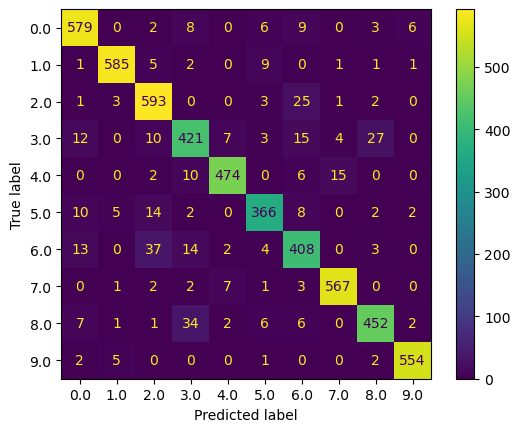

In [27]:
y_pred = clf.predict(x_test_norm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()